<a href="https://colab.research.google.com/github/zaynoub/Predictive-Analysis-of-Corporate-Bankruptcy/blob/main/EDA_on_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#importing libraries
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [9]:
#importing the data
from google.colab import files
uploaded=files.upload()
df1 = pd.read_csv('1year.csv', na_values=['?'])
df2 = pd.read_csv('2year.csv', na_values=['?'])
df3 = pd.read_csv('3year.csv', na_values=['?'])
df4 = pd.read_csv('4year.csv', na_values=['?'])
df5 = pd.read_csv('5year.csv', na_values=['?'])

Saving 5year.csv to 5year.csv
Saving 4year.csv to 4year.csv
Saving 3year.csv to 3year.csv
Saving 2year.csv to 2year.csv
Saving 1year.csv to 1year.csv


In [10]:
#importing the csv file with the attribute names
upload=files.upload()
atrributes=pd.read_csv('AtrributeNames.csv')

Saving AtrributeNames.csv to AtrributeNames.csv


In [11]:
#merging the 5 datasets
df_merged = pd.concat([df1,df2,df3,df4,df5], axis=0)

In [12]:
#Labeling the dataset
atrribute_names = atrributes['Column Names'].tolist()
df_merged.columns = [df_merged.columns[0]] + atrribute_names[0:65] + [df_merged.columns[-1]]

In [13]:
#having a quick look to the dataset
df_merged.head()

,id,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,2,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,3,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,4,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,5,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [14]:
#summary statistics
df_merged.describe()

,id,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
count,43405.000000,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,...,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000
mean,4539.067342,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,...,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,0.048174
std,2800.837733,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,...,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482,0.214137
min,1.000000,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000
25%,2171.000000,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,...,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800,0.000000
50%,4341.000000,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,...,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500,0.000000
75%,6661.000000,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,...,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200,0.000000
max,10503.000000,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000


In [15]:
#nature of the attributes
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 66 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   id                                                                                                                 43405 non-null  int64  
 1   net profit / total assets                                                                                          43397 non-null  float64
 2   total liabilities / total assets                                                                                   43397 non-null  float64
 3   working capital / total assets                                                                                     43397 non-null  float64
 4   current assets / short-

In [16]:
#handling missing values
df_merged.isnull().sum()


id                                           0
net profit / total assets                    8
total liabilities / total assets             8
working capital / total assets               8
current assets / short-term liabilities    134
                                          ... 
sales / receivables                        102
(short-term liabilities *365) / sales      127
sales / short-term liabilities             134
sales / fixed assets                       812
class                                        0
Length: 66, dtype: int64

In [17]:
df_merged.isnull().sum().sum()


41322

In [18]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(df_merged)
df = imputer.transform(df_merged)
df = pd.DataFrame(df, columns=df_merged.columns)
df.isnull().sum().sum()

0

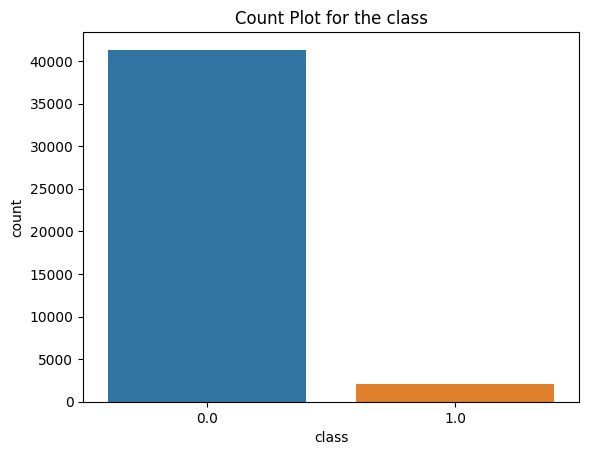

In [19]:
sns.countplot(x='class', data=df)
plt.title('Count Plot for the class')
plt.show()

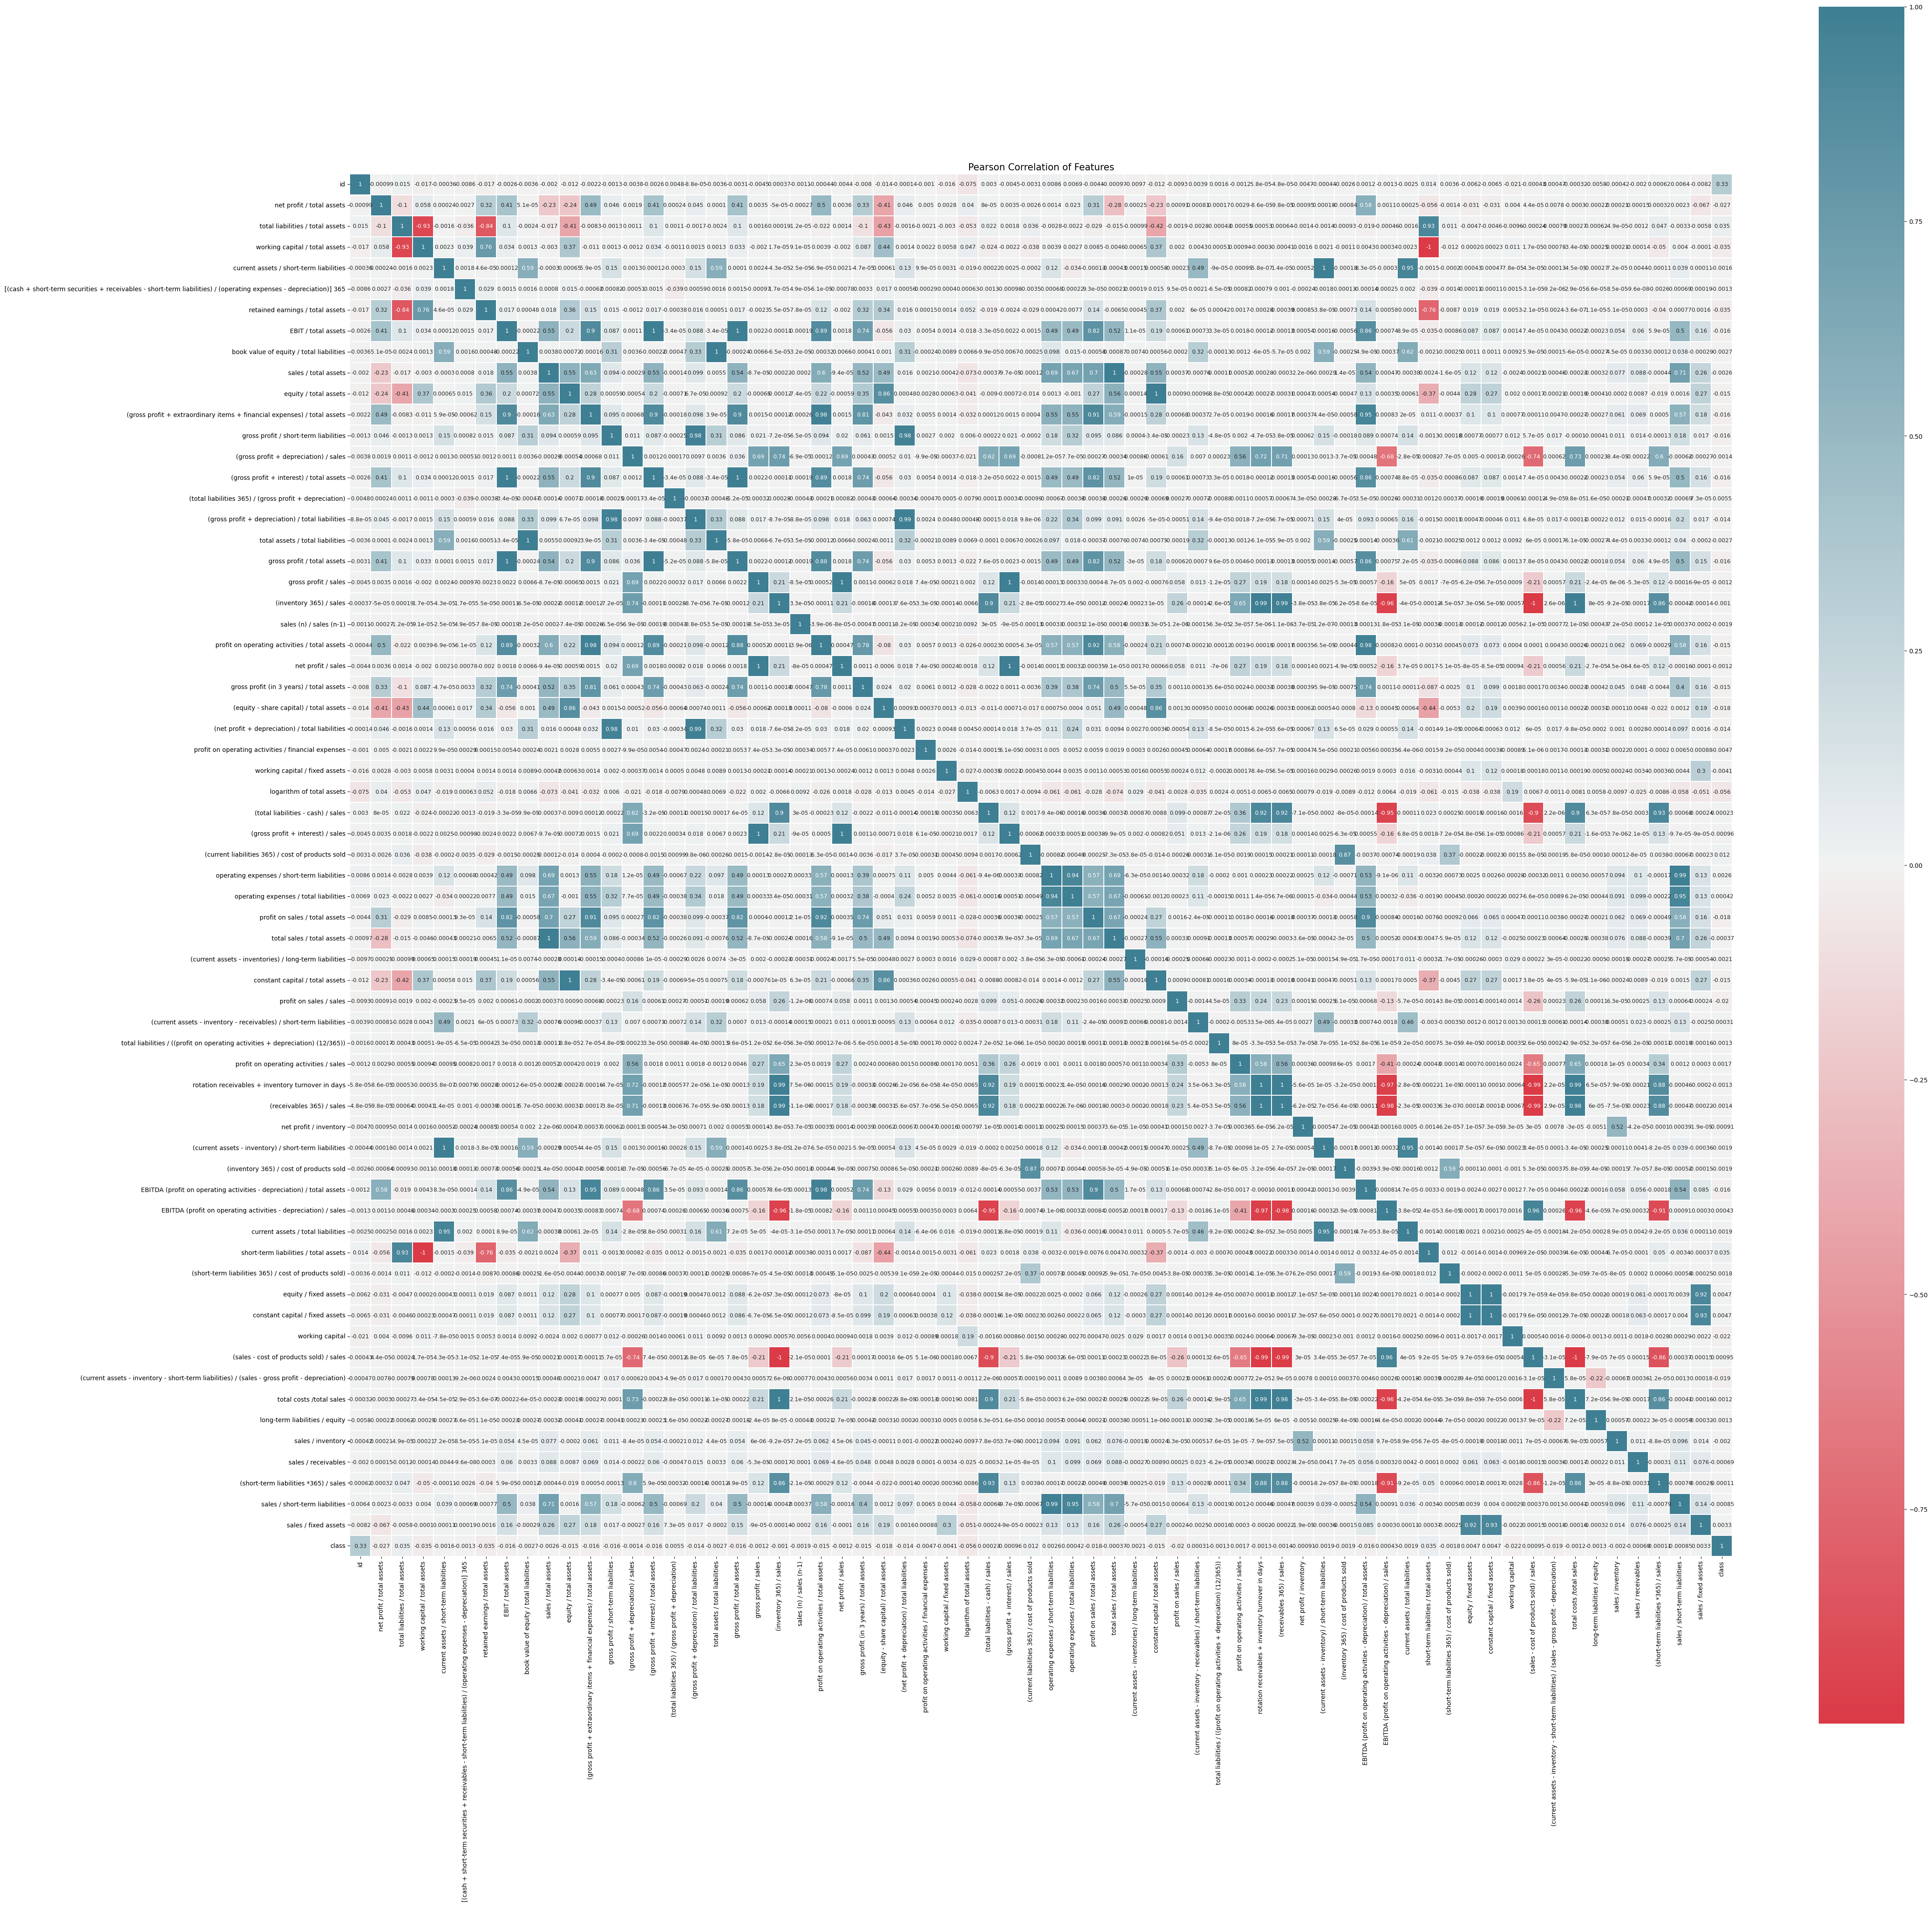

In [21]:
plt.figure(figsize=(50,50))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(df.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':9 })
plt.show()

In [ ]:
sns.pairplot(df, height=2.5)
plt.show()